In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
X=pd.concat([X,geography,gender],axis=1)

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [8]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
# list all data in history
print(model_history.history.keys())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 5s 1ms/step - loss: 0.5540 - accuracy: 0.7434 - val_loss: 0.4792 - val_accuracy: 0.8080
Epoch 2/100
5359/5359 [==============================] - 2s 463us/step - loss: 0.4631 - accuracy: 0.8085 - val_loss: 0.4517 - val_accuracy: 0.8145
Epoch 3/100
5359/5359 [==============================] - 3s 577us/step - loss: 0.4407 - accuracy: 0.8173 - val_loss: 0.4381 - val_accuracy: 0.8164
Epoch 4/100
5359/5359 [==============================] - 2s 402us/step - loss: 0.4271 - accuracy: 0.8220 - val_loss: 0.4311 - val_accuracy: 0.8194
Epoch 5/100
5359/5359 [==============================] - 3s 560us/step - loss: 0.4178 - accuracy: 0.8242 - val_loss: 0.4246 - val_accuracy: 0.8224
Epoch 6/100
5359/5359 [==============================] - 2s 414us/step - loss: 0.4093 - accuracy: 0.8268 - val_loss: 0.4202 - val_accuracy: 0.8213
Epoch 7/100
5359/5359 [==============================] - 3s 557us/step -

5359/5359 [==============================] - 6s 1ms/step - loss: 0.3324 - accuracy: 0.8638 - val_loss: 0.3618 - val_accuracy: 0.8542
Epoch 57/100
5359/5359 [==============================] - 4s 659us/step - loss: 0.3320 - accuracy: 0.8660 - val_loss: 0.3618 - val_accuracy: 0.8538
Epoch 58/100
5359/5359 [==============================] - 4s 796us/step - loss: 0.3318 - accuracy: 0.8671 - val_loss: 0.3630 - val_accuracy: 0.8493
Epoch 59/100
5359/5359 [==============================] - 6s 1ms/step - loss: 0.3319 - accuracy: 0.8649 - val_loss: 0.3617 - val_accuracy: 0.8512
Epoch 60/100
5359/5359 [==============================] - 3s 633us/step - loss: 0.3318 - accuracy: 0.8632 - val_loss: 0.3612 - val_accuracy: 0.8516
Epoch 61/100
5359/5359 [==============================] - 6s 1ms/step - loss: 0.3311 - accuracy: 0.8643 - val_loss: 0.3643 - val_accuracy: 0.8546
Epoch 62/100
5359/5359 [==============================] - 5s 907us/step - loss: 0.3316 - accuracy: 0.8647 - val_loss: 0.3618 - val_

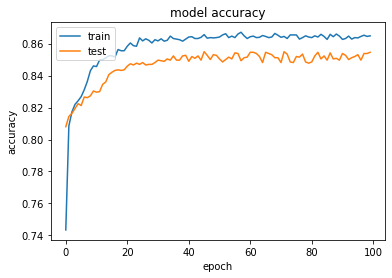

In [14]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

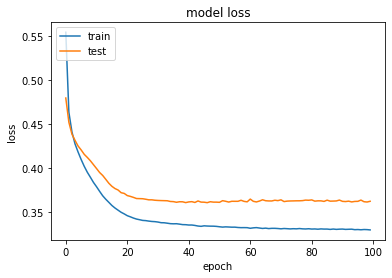

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[1507,   88],
       [ 199,  206]], dtype=int64)

In [19]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [20]:
score

0.8565